In [11]:
import pandas as pd
import seaborn as sns

In [12]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.shape

(7043, 21)

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Target Column
The target variable for this problem is churn, which indicates whether a customer has discontinued the service.


-This is a binary classification problem with values:


    -Yes : Customer churned
    -No : Customer retained
## Categorical Features
-The dataset contains several categorical variables representing customer choices and service configurations, including: 

    -MultipleLines
    -InternetService
    -Contract
    -PaymentMethod  
    
-These features are important as they capture custoer behavior and service preferences that directly influence churn.
## Missing Values
-The dataset does not contain explicit missing values.


-However, the TotalCharges column is stored as an object data type and contains blank entries, which represent missing values.


-These will be handled during the data processing stage.

In [16]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

<Axes: xlabel='Contract', ylabel='count'>

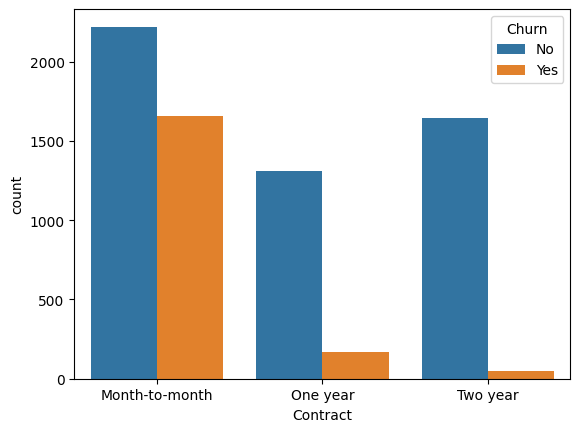

In [17]:
sns.countplot(x='Contract', hue='Churn', data=df)

## Churn Distribution

**What was analyzed**

The number of customers who churned versus those who did not churn.

**Observation**

Most customers did not churn, while a smaller portion of customers churned. This indicates that the dataset is imbalanced.

**Business Insights**

Because the dataset is imbalanced, accuracy alone is not a reliable evaluation metric. Metrics like recall, precesion, and ROC-AUC will be more suitable for evaluating churn prediction models.

<Axes: xlabel='tenure', ylabel='Count'>

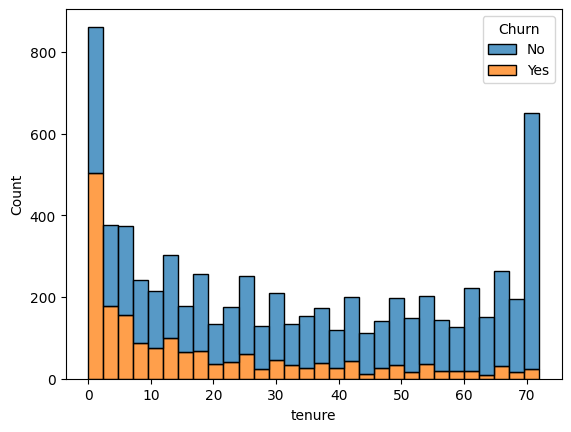

In [18]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, multiple='stack')

## Churn vs Tenure
**What was analyzed**

The distribution of customer tenure for churned and non-churned customers.

**Observation**

Customers with shorter tenure show a higher churn rate, while customers with longer tenure are more likely to stay with the service. Churn is concentrated in the early months of customer tenure.

**Business Insight**

New customers are at a higher risk to churn. This suggests that early engagement stratergies, such as onboarding support, personalized offers, or follow-up communication during the initial months, can significantly reduce churn.

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

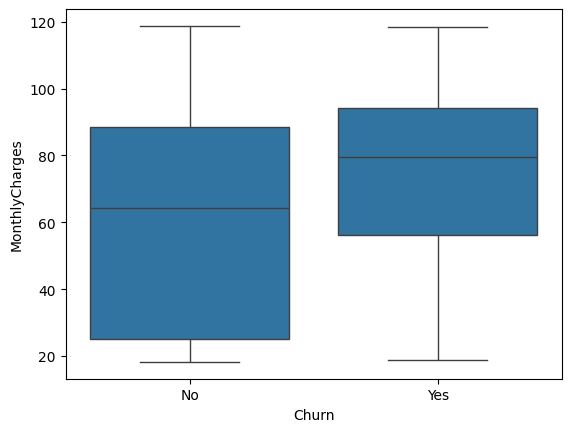

In [19]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

## Churn vs Monthly Charges
**What was analyzed**

The Distribution of monthly charges for churned and non-churned customers.

**Observation**

Customer with higher monthly charges show a higher churn rate, while customers with lower monthly charges are more likely to stay with the service.

**Business Insight**
Higher monthly costs may lead to dissatisfaction if customers do not perceive sufficient value. Offering personalized discounts, flexible pricing plans, or value-added services to high-paying customers coulb help reduce churn.
